# Predicitive
__Author__: Tejas Bhakta

In this Notebook, we will fetch gun violence and mental health data from our csv files using pandas, and using statisical tests to create a formula for a least squares regression line, which we will use to approximately predict a number of firearm deaths based on a user input of a number of Mental Illnesses (Any Mental Illness)

In [5]:
def gunshot_data_fetch():
    """
    Uses pandas to fetch gunshot data from our gunshot.csv
    """
    
    import pandas as pd
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
    
    
    gun_df = pd.read_csv('../data/gunshot.csv')
    gun_df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in gun_df['State']])

    return gun_df

In [6]:
def mental_data_fetch(file_path):
    """
    Uses pandas to fetch the mental health data at a specific file_path (we have 2 mental health data file, one with totals,
    one with %'s by state')
    :param filepath, str, path where the mental health data.csv we want is stored. 
    return: pandas table
    """
    
    import pandas as pd
    
    mental_df = pd.read_csv(file_path)
    # mental_df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in mental_df['State']])
    # we don't need this line since the csv already has the codes

    return mental_df

In [7]:
mental_data_fetch('../data/mental_health_percentage.csv')
#no commas in numbers here, just dealing with percent values that are in float already


,Unnamed: 0,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,0,AL,4.23,18.47,12.98,3.57,6.66,Alabama
1,1,AK,4.53,20.01,13.54,5.15,7.39,Alaska
2,2,AZ,4.04,17.52,11.87,4.01,6.03,Arizona
3,3,AR,5.45,21.02,15.54,4.47,8.13,Arkansas
4,4,CA,3.61,17.15,11.59,3.96,6.04,California
5,5,CO,4.61,20.05,15.86,4.88,7.62,Colorado
6,6,CT,3.59,18.00,17.05,3.76,6.84,Connecticut
7,7,DE,4.23,17.71,15.06,4.35,6.52,Delaware
8,9,FL,3.56,17.30,12.75,3.34,6.12,Florida
9,10,GA,4.17,17.74,12.03,3.94,6.72,Georgia


In [8]:
import pandas as pd
import locale
from locale import atof
def mental_to_float():
    """
    Function to convert the Totals mental health by state data to float, since the commas in the numbers messed stuff up
    """
    ### read data
    df_mh = pd.read_csv('../data/mental_health.csv')
    df_mh

    # way to change string with comma to float
    locale.setlocale(locale.LC_NUMERIC, '') 

    ### generate new mental health data frame
    df_mh_1 = df_mh[[[i for i in df_mh][1]]]
    df_mh_2 = df_mh[[i for i in df_mh][2:-1]].applymap(atof)### change string with comma to float
    df_mh_3 = df_mh[[[i for i in df_mh][-1]]]

    df_mh_new = pd.concat([df_mh_1,df_mh_2,df_mh_3],axis=1) ### merge
    return df_mh_new
    

In [9]:
import pandas

def alphabetize(gun_df, gun_item):
    """
    Puts gun_df[gun_item] in alphabetical order by State for our correlation test, 
    and returns it as a list that is in alphabetical order by respective state. 
    """
    gun = list(gun_df[gun_item])
    gun_state_order = list(gun_df['State'])
    gun, gun_state_order = zip(*sorted(zip(gun_state_order, gun)))

    return gun_state_order
    
                

# Assumptions
In order to use the Pearson correlation test and t-test , we can safely assume ([t-test Assumptions](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#ixzz5H7bBuuhF)):

- Approximate Normality in gun violence occurrence and mental health by the Law of Large Numbers since we have huge population sizes 
    - [Law of Large Numbers](https://www.britannica.com/science/law-of-large-numbers)
    - [Law of Large Numbers Diagram](https://en.wikipedia.org/wiki/Law_of_large_numbers#/media/File:Lawoflargenumbers.svg)
- Large Outliers are rare
    - The data being used has been chosen from the middle ten measurements from a total of thirty, which would minimize large outliers in gain readings.
- Large Sample Size used
- Homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. 



# Statistics Crash Course

- __Correlation Coefficient (r)__: a bigger number implies a greater correlation. Numbers close to 0 indicate a lesser correlation
    - Positive means as x increases, so does y. Greater than 0.5 implies a strong correlation 
    - Negative means as x increases, y decreases. Less than -0.5 impilies a strong correlation
    
- __t-value__: bigger number is bad, we want a number as small as possible. Less than .05 is ideal, so we can reject the null hypothesis with 95% confidence

- __Null Hypthesis__: The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of 'no effect' or 'no difference'.

# Conclusion
- Our strongest data is the correlation between Total Mental Illness/Total Serious Mental Illness and Total Gun Fatalities in each state
    - With a correlation of .89, these data sets have a very strong correlation
    - Our t-test values are very strong as well, and __we are able to conclude total Mental Illnesses in a State affect Total Gun Fatalities with 99.7% confidence__ and make approximate predictions
    
- Violent Crimes in each State include rape, assault, gun violence, etc. Violent Crimes in each State and Mental Illness are not correlated
    - This further __strengthens our claim__ that total Mental Illnesses in a State affect Total Gun Fatalities because gun violence is a subset of this broader dataset

# Predicitive Model

We will fetch gun violence and mental health data from our csv files using pandas, and using statisical tests to create a formula for a least squares regression line, which we will use to approximately predict a number of firearm deaths based on a user input of a number of Mental Illnesses (Any Mental Illness)

In [44]:
def predictive(mental_illnesses):
    """
    Predict number of gun fatalities in a state with the number of mental illnesses provided
    
    :@param: mental illnesses: int,  number of mental illnesses (any level) to be used in prediction (ex 1,000,000)
    """
    import scipy
    from scipy import stats
    from scipy.stats import pearsonr
    import matplotlib.pyplot as plt
    import matplotlib
    
    assert isinstance(mental_illnesses, int)
    assert mental_illnesses > 0
    
    #gun is not in alphabetical order
    #mental is in alphabetical order
    gun_df = gunshot_data_fetch()
    
    alph_gun = alphabetize(gun_df, 'Total firearm deaths 2016')
    mental = mental_to_float()
    mental = mental['Any Mental Illness']

    x = list(alph_gun)
    y = list(mental)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    # mental_illnesses need to be in the thousands, like our other data
    mental_illnesses_thou = mental_illnesses/1000
    
    y_predicted = slope*mental_illnesses_thou + intercept
    
    
    import numpy as np  
    import matplotlib.pyplot as plt  
    def graph(formula, x_range):  
        """
        Plots a line of our predictive model
        """
        x = np.array(x_range)  
        y = eval(formula)
        plt.ylabel('Gun Fatalities Prediction')
        plt.xlabel('Mental Heath Ilnesses (in thousands)')
        plt.plot(x, y)  
        plt.show()
    
    # plotting our predictive model, for reference for the user
    graph('1.1165209783799692*x + 17.79999524947607', range(0,3*(mental_illnesses/1000)))
    

    print ('The predicted number of Firearm Deaths in a State with %d Mental Illnesses (Any Severity) is %d') %(mental_illnesses, y_predicted)
    print('( Look at %d on the plots x-axis since the x axis is the the scale of thousands)') %(mental_illnesses/1000)

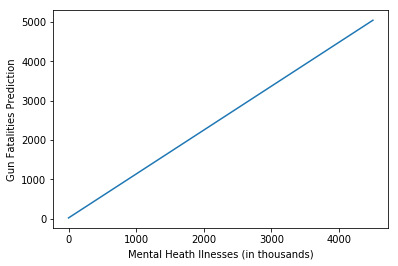

The predicted number of Firearm Deaths in a State with 1500000 Mental Illnesses (Any Severity) is 1692
( Look at 1500 on the plots x-axis since the x axis is the the scale of thousands)


In [45]:
predictive(1500000)
# input the number of any mental illness occurences
# predicting number of firearm deaths for 1.5 million mental illnesses